In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [145]:
dataset = pd.read_csv("ex1data.txt",header=None)
dataset.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [146]:
dataset.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [0]:
def normalize_features(X):
    mean = np.mean(X, axis = 0)
    std_dev = np.std(X, axis = 0)
    X_Norm = (X - mean) / std_dev
    return X_Norm

In [0]:
def compute_error(X,Y,w):
    h_x = X.dot(w)
    squareError = (Y - h_x) ** 2
    return (1/(2*len(Y))) * np.sum(squareError)

In [149]:
data = dataset.values
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [150]:
data=dataset.values
m = data[:,0].size
ones = np.ones(m).reshape(-1,1)
X = np.append(ones,data[:,0].reshape(-1,1),axis = 1)
Y = data[:,1].reshape(-1,1)
w = np.zeros((2,1))
print(compute_error(X,Y,w))

32.072733877455676


In [151]:
compute_error(X,Y,w)

32.072733877455676

In [0]:
def gradient_descent(X,Y,w,learning_rate,iterations):

    m=len(Y)
    error_cost_iteration = []

    for iter in range(iterations):
        h_x = np.dot(X,w)
        error = np.matmul(X.transpose(),(h_x - Y)) 
        gradient_descent = learning_rate / m * error
        w = w - gradient_descent
        error_cost_iteration.append(compute_error(X,Y,w))

    return w,error_cost_iteration

In [153]:
w,error_cost_iteration = gradient_descent(X,Y,w,0.01,15000)
print(w)
print(error_cost_iteration)

[[-3.89578088]
 [ 1.19303364]]
[6.737190464870006, 5.931593568604956, 5.901154707081388, 5.895228586444221, 5.89009494311733, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806386, 5.86482686531293, 5.859827889932181, 5.85484692057229, 5.849883892376588, 5.844938740722034, 5.840011401218361, 5.8351018097072265, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.81081784262787, 5.806013404630044, 5.801226271940628, 5.796456382226898, 5.791703673380653, 5.786968083517396, 5.782249550975539, 5.777548014315596, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434048, 5.754293134309077, 5.749692295048628, 5.745108027745684, 5.740540272709014, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333528, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.700163786123856, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.6

Text(0, 0.5, 'w')

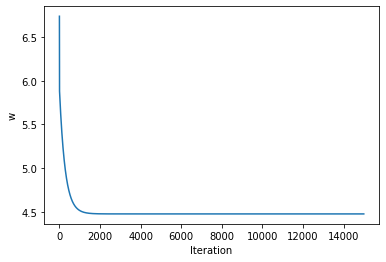

In [154]:
plt.plot(error_cost_iteration)
plt.xlabel("Iteration")
plt.ylabel("w")